making predictions using the the logistic regression model

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv("data/processed_train_data.csv")
test_data = pd.read_csv("data/processed_test_data.csv")

In [9]:
x_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

x_test = test_data.copy()

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [19]:
model = LogisticRegression(max_iter=300)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=300)

In [20]:
predictions = model.predict(x_test_scaled)

In [21]:
# load passenger IDs from file
pids = pd.read_csv("data/test.csv")['PassengerId']

In [22]:
submission = pd.DataFrame({
    'PassengerId': pids,
    'Survived': predictions
})

In [23]:
submission.to_csv("data/submissions/logistic-regression-predictions.csv", index=False)

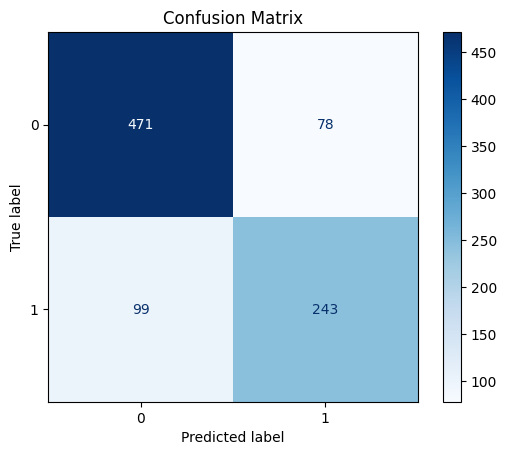

In [24]:
# display the confusion matrix
y_pred_train = model.predict(x_train_scaled)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [10, 20, 50, 100, 200, 500, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'tol': [0.0001, 0.00001, 0.0000001],
    'dual': [True, False]
}

In [38]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'dual': [True, False],
                         'max_iter': [10, 20, 50, 100, 200, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-07]},
             scoring='accuracy', verbose=1)

In [40]:
# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Parameters: {'C': 100, 'dual': True, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}
Best Cross-Validation Score: 0.7968802962776975


In [41]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_

In [42]:
predictions = best_model.predict(x_test_scaled)

In [43]:
submission.to_csv("data/submissions/logistic-regression-improved.csv", index=False)